In [1]:
import pandas as pd
import numpy as np
from pycaret.regression import *

In [2]:
import matplotlib as mlp
import matplotlib.pyplot as plt
import matplotlib.font_manager
import matplotlib.dates as mdates

In [3]:
# 유니코드 깨짐현상 해결
mlp.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
mlp.rcParams["font.family"] = 'NanumGothic'

In [4]:
from data_split import *

In [5]:
ml_data = pd.read_pickle("/home/seho/Passenger_Demand/data/ml_data.pkl")

In [6]:
ml_data["month"] = ml_data["transdate"].dt.month

In [7]:
ml_data = ml_data.set_index(["mybi_stop_id", "stop_nm", "transdate"])

In [8]:
ml_data["hour"] = ml_data["hour"].astype(str)

In [9]:
# splitted_data = split(X_data = ml_data.drop(["date", "longitude", "latitude", "totalcnt", "studentcnt", "childcnt", "normalcnt"], 1),
#                       Y_data = ml_data["totalcnt"],
#                       split_ratio = [0.5, 0.3, 0.2], 
#                       seed = 1234)

In [10]:
# train_data = pd.concat([splitted_data["X_train"], splitted_data["Y_train"]], 1)

In [11]:
categorical_feature = ["dayofweek", "hour", "ntl_holi", "holi", "seq_holi"]

In [12]:
numerical_feature = [col for col in ml_data.columns if col not in categorical_feature + ["totalcnt"]]

In [13]:
reg_experiment = setup(ml_data, 
                       target = "totalcnt", 
                       categorical_features = categorical_feature,
                       numeric_features = numerical_feature,
                       ignore_features = ["longitude", "latitude", "studentcnt", "childcnt", "normalcnt"],
                       train_size = 0.7,
                       n_jobs = 14,
                       session_id = 12345,
#                        log_experiment = True,
#                        log_plots = True,
#                        log_profile = True,
#                        log_data = True,
#                        profile = True,
                       experiment_name="Passenger_Demand")

,Description,Value
0,session_id,12345
1,Target,totalcnt
2,Original Data,"(620940, 173)"
3,Missing Values,True
4,Numeric Features,162
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(434657, 189)"


In [ ]:
%%time
base_models = compare_models()

IntProgress(value=0, description='Processing: ', max=19)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:58:13
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Light Gradient Boosting Machine,1.4751,7.1316,2.6704,0.8151,0.4580,0.5125,5.9580


In [74]:
%%time
base_models = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,1.4751,7.1316,2.6704,0.8151,0.4580,0.5125,6.6880
et,Extra Trees Regressor,1.4671,7.1558,2.6749,0.8145,0.4558,0.5202,243.1430
rf,Random Forest Regressor,1.4717,7.2648,2.6952,0.8116,0.4584,0.5208,236.2830
gbr,Gradient Boosting Regressor,1.5186,7.4818,2.7351,0.8060,0.4719,0.5240,71.2490
lr,Linear Regression,1.5788,7.7717,2.7876,0.7985,0.4968,0.5537,1.7820
ridge,Ridge Regression,1.5788,7.7718,2.7877,0.7985,0.4968,0.5536,0.1860
br,Bayesian Ridge,1.5787,7.7720,2.7877,0.7985,0.4967,0.5537,7.2040
omp,Orthogonal Matching Pursuit,1.6079,8.0339,2.8343,0.7917,0.5081,0.5611,0.2850
en,Elastic Net,1.5903,8.1396,2.8529,0.7890,0.4994,0.5595,6.0260
lasso,Lasso Regression,1.5907,8.1836,2.8605,0.7878,0.5014,0.5562,4.5970


CPU times: user 56.7 s, sys: 20.7 s, total: 1min 17s
Wall time: 1h 51min 50s


In [ ]:
["lightgbm", "rf", "gbr", "lr", "ridge", "lasso", "en", "knn"]

In [14]:
%%time
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.4729,7.1107,2.6666,0.8162,0.4577,0.5151
1,1.4736,7.1811,2.6798,0.8168,0.4551,0.5109
2,1.4750,7.0240,2.6503,0.8165,0.4575,0.5149
3,1.4687,7.0384,2.6530,0.8150,0.4603,0.5054
4,1.4487,6.8619,2.6195,0.8161,0.4544,0.5088
5,1.4780,7.3085,2.7034,0.8100,0.4599,0.5139
6,1.4763,7.1637,2.6765,0.8146,0.4573,0.5108
7,1.4814,7.1996,2.6832,0.8152,0.4599,0.5108
8,1.4984,7.3471,2.7105,0.8130,0.4589,0.5172
9,1.4778,7.0811,2.6610,0.8177,0.4593,0.5172


CPU times: user 1min 35s, sys: 4.73 s, total: 1min 39s
Wall time: 1min 35s


In [75]:
tuned_lightgbm_optuna_tpe[0]

LGBMRegressor(bagging_fraction=0.898696025328748, bagging_freq=3,
              boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              feature_fraction=0.9734779470766721, importance_type='split',
              learning_rate=0.04893346422244431, max_depth=-1,
              min_child_samples=68, min_child_weight=0.001,
              min_split_gain=0.6768670878161221, n_estimators=290, n_jobs=14,
              num_leaves=183, objective=None, random_state=12345,
              reg_alpha=1.2720794311863587e-07,
              reg_lambda=1.550851499682914e-10, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [15]:
%%time
tuned_lightgbm_optuna_tpe = tune_model(lightgbm, optimize = "RMSE", search_library = "optuna", search_algorithm = "tpe", fold = 10, return_tuner = True, n_iter = 50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.4393,6.9606,2.6383,0.8201,0.4490,0.5083
1,1.4369,6.9554,2.6373,0.8225,0.4463,0.5031
2,1.4449,6.8746,2.6220,0.8204,0.4493,0.5059
3,1.4337,6.8649,2.6201,0.8195,0.4513,0.4970
4,1.4183,6.7416,2.5964,0.8193,0.4455,0.5002
5,1.4408,7.0169,2.6489,0.8176,0.4511,0.5041
6,1.4474,7.0176,2.6491,0.8184,0.4492,0.5024
7,1.4494,7.0438,2.6540,0.8192,0.4514,0.5015
8,1.4634,7.1629,2.6764,0.8177,0.4503,0.5064
9,1.4479,6.9731,2.6407,0.8205,0.4499,0.5082


CPU times: user 14h 57min 1s, sys: 18h 14min 13s, total: 1d 9h 11min 14s
Wall time: 2h 10min 15s


In [16]:
%%time
tuned_lightgbm_tune_sklearn_hyperopt = tune_model(lightgbm, optimize = "RMSE", search_library = "tune-sklearn", search_algorithm = "hyperopt", fold = 10, return_tuner = True, n_iter = 50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.4598,7.0060,2.6469,0.8189,0.4548,0.5151
1,1.4591,7.0489,2.6550,0.8202,0.4520,0.5088
2,1.4659,6.9454,2.6354,0.8185,0.4551,0.5126
3,1.4549,6.9325,2.6330,0.8178,0.4570,0.5036
4,1.4365,6.8085,2.6093,0.8175,0.4513,0.5067
5,1.4660,7.2030,2.6838,0.8127,0.4569,0.5114
6,1.4645,7.1210,2.6685,0.8157,0.4542,0.5092
7,1.4696,7.0987,2.6643,0.8178,0.4566,0.5091
8,1.4847,7.2564,2.6938,0.8153,0.4560,0.5129
9,1.4674,7.0470,2.6546,0.8186,0.4559,0.5156


CPU times: user 4min 41s, sys: 30.8 s, total: 5min 12s
Wall time: 2h 5min 2s


In [73]:
pred_df.to_pickle("pred_df.pkl")

In [31]:
pred_df = predict_model(tuned_lightgbm_optuna_tpe[0])

KeyError: "['dayofweek', 'seq_holi', 'ntl_holi', 'totalcnt_ma_daily_mean_6d', 'totalcnt_ma_daily_mean_4d', 'hour', 'holi', 'totalcnt_ma_daily_week_mean_21d'] not in index"

In [20]:
pred_df

,totalcnt_bf1d,totalcnt_bf2d,totalcnt_bf3d,totalcnt_bf4d,totalcnt_bf5d,totalcnt_bf6d,totalcnt_bf7d,totalcnt_bf1d_total,totalcnt_bf2d_total,totalcnt_bf3d_total,...,hour_5,hour_6,hour_7,hour_8,hour_9,ntl_holi_N,holi_N,seq_holi_N,totalcnt,Label
0,2.0,2.0,4.0,4.0,6.0,2.000000,3.809452,3.550000,1.100000,2.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,7.0,3.054465
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.500000,0.600000,0.500000,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.105458
2,10.0,5.0,4.0,1.0,3.0,0.000000,2.000000,3.600000,3.100000,3.200000,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.714177
3,5.0,12.0,18.0,6.0,16.0,10.000000,16.000000,9.750000,9.050000,10.650000,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,18.0,11.668208
4,1.0,2.0,7.0,10.0,5.0,3.817419,3.809452,2.900000,3.850000,6.350000,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,5.0,5.802991
5,4.0,1.0,2.0,2.0,0.0,1.000000,2.000000,4.150000,4.100000,3.800000,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,5.0,2.310840
6,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.250000,0.200000,0.300000,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.693176
7,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.050000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.236455
8,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.300000,0.350000,0.450000,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.030645
9,2.0,1.0,6.0,0.0,0.0,3.000000,4.000000,4.250000,4.450000,4.400000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.781623


In [25]:
pred_df["error"] = np.abs(pred_df["Label"] - pred_df["totalcnt"])

In [26]:
pred_df.shape

(186283, 192)

In [41]:
X_test = get_config("X_test")
y_test = get_config("y_test")

In [42]:
pd.set_option("display.max_columns", None)

In [ ]:
X_test.iloc[temp,]

In [43]:
y_test.iloc[temp,]

mybi_stop_id  stop_nm       transdate          
3101535       현대출고 사무소앞     2020-08-05 12:00:00    62.0
3101458       성광여고앞         2020-10-13 12:00:00    60.0
                            2020-06-16 17:00:00    60.0
3101481       현대청운고앞        2020-11-04 15:00:00    55.0
3101450       시외고속버스터미널     2020-08-17 21:00:00    84.0
3101481       현대청운고앞        2020-07-21 15:00:00    62.0
3100145       현대중공업 울산대학병원  2020-05-01 17:00:00    15.0
3101454       서여자중학교앞       2020-11-03 16:00:00    81.0
3101432       대왕암공원입구       2020-04-08 07:00:00    46.0
3101458       성광여고앞         2020-06-12 12:00:00    48.0
3101450       시외고속버스터미널     2020-08-09 20:00:00    78.0
3101489       현대출고 사무소앞     2020-08-12 15:00:00    60.0
3100145       현대중공업 울산대학병원  2020-10-06 17:00:00    73.0
3101489       현대출고 사무소앞     2020-07-21 16:00:00    50.0
3101432       대왕암공원입구       2020-05-27 07:00:00    83.0
3101504       공업탑           2020-08-03 12:00:00    55.0
3101458       성광여고앞         2020-08-31 16:00:00    52.0


In [62]:
import seaborn as sns

In [63]:
sns.histplot(temp["error"])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [65]:
temp.loc[temp["error"].isna()]

AttributeError: 'Int64Index' object has no attribute 'loc'

<AxesSubplot:ylabel='Frequency'>

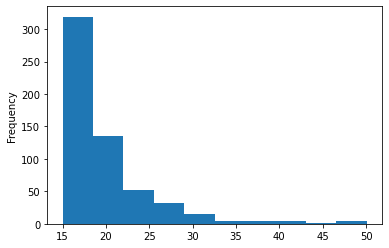

In [71]:
pred_df.loc[pred_df["error"]>15, "error"].plot.hist()

In [35]:
temp = pred_df.sort_values("error", ascending = False).head(20).index

In [60]:
pred_df.sort_values("error", ascending = False).head(20)

,totalcnt_bf1d,totalcnt_bf2d,totalcnt_bf3d,totalcnt_bf4d,totalcnt_bf5d,totalcnt_bf6d,totalcnt_bf7d,totalcnt_bf1d_total,totalcnt_bf2d_total,totalcnt_bf3d_total,totalcnt_bf4d_total,totalcnt_bf5d_total,totalcnt_bf6d_total,totalcnt_bf7d_total,totalcnt_ma_hour_mean_2d,totalcnt_ma_hour_std_2d,totalcnt_ma_hour_mean_3d,totalcnt_ma_hour_std_3d,totalcnt_ma_hour_mean_4d,totalcnt_ma_hour_std_4d,totalcnt_ma_hour_mean_5d,totalcnt_ma_hour_std_5d,totalcnt_ma_hour_mean_6d,totalcnt_ma_hour_std_6d,totalcnt_ma_hour_week_mean_14d,totalcnt_ma_hour_week_std_14d,totalcnt_ma_hour_week_mean_21d,totalcnt_ma_hour_week_std_21d,totalcnt_ma_hour_week_mean_28d,totalcnt_ma_hour_week_std_28d,totalcnt_ma_daily_mean_2d,totalcnt_ma_daily_std_2d,totalcnt_ma_daily_mean_3d,totalcnt_ma_daily_std_3d,totalcnt_ma_daily_std_4d,totalcnt_ma_daily_mean_5d,totalcnt_ma_daily_std_5d,totalcnt_ma_daily_std_6d,totalcnt_ma_daily_week_mean_14d,totalcnt_ma_daily_week_std_14d,totalcnt_ma_daily_week_std_21d,totalcnt_ma_daily_week_mean_28d,totalcnt_ma_daily_week_std_28d,totalcnt_ma_weekly_mean_2,totalcnt_ma_weekly_std_2,totalcnt_ma_weekly_mean_3,totalcnt_ma_weekly_std_3,totalcnt_ma_weekly_mean_4,totalcnt_ma_weekly_std_4,temperature,humidity,precipitation,snowfall,pm_alert_cnt,store_category_0,store_category_1,store_category_2,store_category_3,store_category_4,store_category_5,store_category_6,store_category_7,store_category_8,store_category_9,store_category_10,store_category_11,store_category_12,store_category_13,store_category_14,store_category_15,store_category_16,store_category_17,store_category_18,store_category_19,store_category_20,store_category_21,store_category_22,store_category_23,store_category_24,store_category_25,store_category_26,store_category_27,store_category_28,store_category_29,store_category_30,store_category_31,store_category_32,store_category_33,store_category_34,store_category_35,store_category_36,store_category_37,store_category_38,store_category_39,store_category_40,store_category_41,store_category_42,store_category_43,store_category_44,store_category_45,store_category_46,store_category_47,store_category_48,store_category_49,store_category_50,store_category_51,store_category_52,store_category_53,store_category_54,store_category_55,store_category_56,store_category_57,store_category_58,store_category_59,store_category_60,store_category_61,store_category_62,store_category_63,store_category_64,store_category_65,store_category_66,store_category_67,store_category_68,store_category_69,store_category_70,store_category_71,store_category_72,store_category_73,store_category_74,store_category_75,store_category_76,store_category_77,store_category_78,store_category_79,store_category_80,store_category_81,store_category_82,store_category_83,store_category_84,store_category_85,store_category_86,store_category_87,store_category_88,store_category_89,hospital_category_0,hospital_category_1,hospital_category_2,hospital_category_3,hospital_category_4,hospital_category_5,school_category_0,school_category_1,school_category_2,school_category_3,school_category_4,school_category_5,event_nearby,festival_nearby,month,dayofweek_금,dayofweek_목,dayofweek_수,dayofweek_월,dayofweek_일,dayofweek_토,dayofweek_화,hour_0,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,hour_5,hour_6,hour_7,hour_8,hour_9,ntl_holi_N,holi_N,seq_holi_N,totalcnt,Label,error
25725,11.000000,11.000000,1.000000,0.000000,43.000000,8.000000,16.000000,4.750000,5.000000,2.050000,2.450000,8.250000,5.250000,5.300000,11.000000,0.000000,7.666667,5.773503,5.750000,6.075909,13.200000,17.469975,12.333333,15.769168,10.000000,8.485281,8.333333,6.658328,7.250000,5.852350,97.500000,3.535534,78.666664,32.715950,30.554596,90.000000,49.578220,44.764942,90.000000,22.627417,16.502525,90.500000,14.617341,93.357140,3.939595,95.571426,4.740189,94.071426,4.896896,30.600000,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0

In [ ]:
pycaret}

In [44]:
mybicard_401_agg = pd.read_parquet("/home/seho/Passenger_Demand/data/mybicard_401_agg.parquet")

In [59]:
mybicard_401_agg.loc[(mybicard_401_agg["transdate"].dt.date == pd.to_datetime("2020-08-18").date()) & (mybicard_401_agg["mybi_stop_id"] == 3101535)]

,mybi_stop_id,transdate,normalcnt,studentcnt,childcnt,totalcnt


In [15]:
%%time
lightgbm_tweedie = create_model('lightgbm', objective = "tweedie")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.4615,7.2690,2.6961,0.8122,0.4481,0.5201
1,1.4628,7.3468,2.7105,0.8126,0.4462,0.5152
2,1.4669,7.1605,2.6759,0.8129,0.4482,0.5168
3,1.4559,7.2037,2.6840,0.8106,0.4506,0.5084
4,1.4335,6.9794,2.6418,0.8129,0.4439,0.5115
5,1.4634,7.4328,2.7263,0.8068,0.4504,0.5155
6,1.4664,7.2893,2.6999,0.8113,0.4485,0.5145
7,1.4740,7.4371,2.7271,0.8091,0.4512,0.5131
8,1.4884,7.5174,2.7418,0.8086,0.4499,0.5190
9,1.4691,7.2547,2.6934,0.8132,0.4498,0.5190


CPU times: user 47.2 s, sys: 891 ms, total: 48.1 s
Wall time: 1min 14s


In [16]:
%%time
lightgbm_poisson = create_model('lightgbm', objective = "poisson") #2.6651

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.4799,7.2428,2.6913,0.8128,0.4554,0.5169
1,1.4808,7.3288,2.7072,0.8130,0.4532,0.5124
2,1.4841,7.1257,2.6694,0.8138,0.4554,0.5131
3,1.4738,7.1333,2.6708,0.8125,0.4580,0.5055
4,1.4542,6.9424,2.6348,0.8139,0.4518,0.5085
5,1.4848,7.4138,2.7228,0.8073,0.4579,0.5137
6,1.4871,7.2980,2.7015,0.8111,0.4560,0.5127
7,1.4909,7.3494,2.7110,0.8114,0.4584,0.5111
8,1.5059,7.4763,2.7343,0.8097,0.4571,0.5159
9,1.4850,7.2341,2.6896,0.8138,0.4566,0.5157


CPU times: user 1min 3s, sys: 1.57 s, total: 1min 5s
Wall time: 1min 34s


In [27]:
predict_model(lightgbm_poisson, round = 1)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,1.5,7.4,2.7,0.8,0.5,0.5


,totalcnt_bf1d,totalcnt_bf2d,totalcnt_bf3d,totalcnt_bf4d,totalcnt_bf5d,totalcnt_bf6d,totalcnt_bf7d,totalcnt_bf1d_total,totalcnt_bf2d_total,totalcnt_bf3d_total,...,month_10,month_11,month_4,month_5,month_6,month_7,month_8,month_9,totalcnt,Label
0,0.000000,0.000000,2.000000,1.000000,3.000000,3.000000,1.000000,5.250000,5.400000,5.200000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.514837
1,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.350000,2.050000,1.700000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.621000
2,3.882097,3.889064,3.896786,3.892452,3.887435,3.884892,3.880719,3.877404,3.886567,3.891783,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.063815
3,9.000000,3.000000,4.000000,8.000000,6.000000,6.000000,5.000000,3.950000,4.650000,5.650000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,6.096556
4,11.000000,11.000000,23.000000,24.000000,14.000000,9.000000,10.000000,11.000000,10.850000,16.299999,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,12.413252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186278,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.850000,1.900000,1.900000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.131844
186279,29.000000,30.000000,23.000000,11.000000,28.000000,27.000000,13.000000,14.550000,15.600000,16.450001,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,26.538498
186280,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.250000,0.250000,0.200000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.140326
186281,1.000000,5.000000,3.000000,4.000000,14.000000,5.000000,10.000000,6.550000,5.750000,4.050000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,7.509197


In [23]:
lightgbm_poisson.predict(get_config)

<bound method LGBMModel.predict of LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=14, num_leaves=31, objective='poisson',
              random_state=445, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)>

In [34]:
import pickle

In [35]:
with open("tuned_lightgbm_tune_sklearn_hyperopt.pkl", "wb") as f:
    pickle.dump(tuned_lightgbm_tune_sklearn_hyperopt, f)

In [ ]:
tuned_lightgbm_tune_sklearn_hyperopt

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


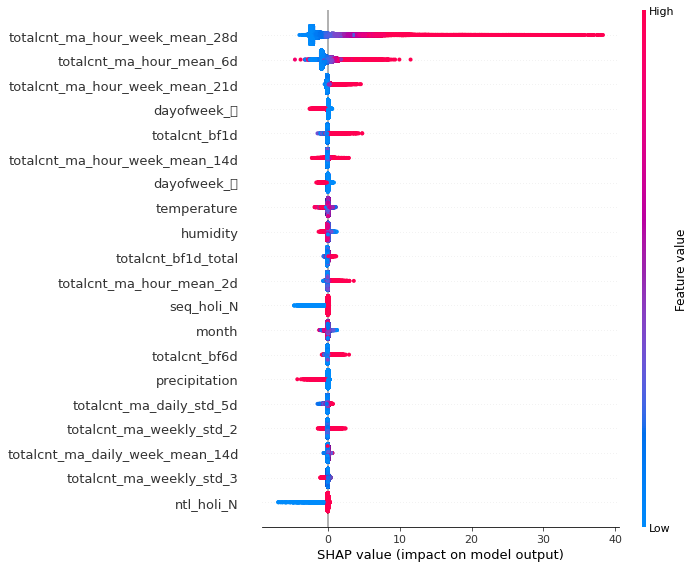

In [76]:
interpret_model(tuned_lightgbm_optuna_tpe[0])

In [77]:
evaluate_model(tuned_lightgbm_optuna_tpe[0])

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [41]:
predict_model(tuned_lightgbm_tune_sklearn_hyperopt[0], round = 4)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,1.4736,7.1305,2.6703,0.8129,0.4528,0.4915


,totalcnt_bf1d,totalcnt_bf2d,totalcnt_bf3d,totalcnt_bf4d,totalcnt_bf5d,totalcnt_bf6d,totalcnt_bf7d,totalcnt_bf1d_total,totalcnt_bf2d_total,totalcnt_bf3d_total,...,month_10,month_11,month_4,month_5,month_6,month_7,month_8,month_9,totalcnt,Label
0,0.000000,0.000000,2.000000,1.000000,3.000000,3.000000,1.000000,5.250000,5.400000,5.200000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.443347
1,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.350000,2.050000,1.700000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.562062
2,3.882097,3.889064,3.896786,3.892452,3.887435,3.884892,3.880719,3.877404,3.886567,3.891783,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.124041
3,9.000000,3.000000,4.000000,8.000000,6.000000,6.000000,5.000000,3.950000,4.650000,5.650000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,5.856812
4,11.000000,11.000000,23.000000,24.000000,14.000000,9.000000,10.000000,11.000000,10.850000,16.299999,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,11.261317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186278,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.850000,1.900000,1.900000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.171810
186279,29.000000,30.000000,23.000000,11.000000,28.000000,27.000000,13.000000,14.550000,15.600000,16.450001,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,26.052156
186280,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.250000,0.250000,0.200000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.057737
186281,1.000000,5.000000,3.000000,4.000000,14.000000,5.000000,10.000000,6.550000,5.750000,4.050000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,7.115294


In [42]:
evaluate_model(tuned_lightgbm_optuna_tpe[0])

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [39]:
tuned_lightgbm_tune_sklearn_hyperopt[0]

LGBMRegressor(bagging_fraction=0.8235486056623149, bagging_freq=3,
              boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              feature_fraction=0.48133978762994944, importance_type='split',
              learning_rate=0.032839981196858714, max_depth=-1,
              min_child_samples=36, min_child_weight=0.001,
              min_split_gain=0.03884135096559882, n_estimators=292, n_jobs=14,
              num_leaves=192, objective=None, random_state=445,
              reg_alpha=1.80944405965273e-10, reg_lambda=8.425918084588911e-08,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)

In [16]:
%%time
tuned_lightgbm_tune_sklearn_hyperopt = tune_model(lightgbm, optimize = "RMSE", search_library = "tune-sklearn", search_algorithm = "hyperopt", fold = 5, return_tuner = True, n_iter = 20)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.4464,6.6588,2.5805,0.8208,0.4525,0.4902
1,1.4514,6.7919,2.6061,0.8217,0.4515,0.4873
2,1.4524,6.9584,2.6379,0.8204,0.4511,0.4903
3,1.4506,6.8041,2.6085,0.8223,0.4517,0.4933
4,1.4545,6.8988,2.6265,0.8177,0.4525,0.4871
Mean,1.4510,6.8224,2.6119,0.8206,0.4519,0.4896
SD,0.0027,0.1024,0.0196,0.0016,0.0005,0.0023


CPU times: user 7min 35s, sys: 30.6 s, total: 8min 5s
Wall time: 1h 15min 39s


In [18]:
%%time
tuned_lightgbm_optuna_tpe = tune_model(lightgbm, optimize = "RMSE", search_library = "optuna", search_algorithm = "tpe", fold = 5, return_tuner = True, n_iter = 20, objective="tweedie")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.4469,6.6417,2.5771,0.8213,0.4538,0.4905
1,1.4499,6.7691,2.6018,0.8223,0.4524,0.4865
2,1.4550,6.9624,2.6386,0.8203,0.4521,0.4906
3,1.4502,6.8012,2.6079,0.8224,0.4522,0.4930
4,1.4551,6.8938,2.6256,0.8179,0.4536,0.4867
Mean,1.4514,6.8136,2.6102,0.8208,0.4528,0.4895
SD,0.0032,0.1098,0.0210,0.0017,0.0007,0.0025


CPU times: user 2h 24min 20s, sys: 3h 25min 51s, total: 5h 50min 11s
Wall time: 25min 1s


In [31]:
%%time
tuned_lightgbm_poisson_optuna_tpe = tune_model(lightgbm_poisson, optimize = "RMSE", search_library = "optuna", search_algorithm = "tpe", fold = 5, return_tuner = True, n_iter = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.4354,6.7212,2.5925,0.8191,0.4439,0.4854
1,1.4370,6.8391,2.6152,0.8204,0.4423,0.4809
2,1.4416,7.0670,2.6584,0.8176,0.4424,0.4841
3,1.4414,6.9159,2.6298,0.8194,0.4428,0.4882
4,1.4437,6.9577,2.6377,0.8162,0.4438,0.4807
Mean,1.4398,6.9002,2.6267,0.8185,0.4431,0.4839
SD,0.0031,0.1159,0.0221,0.0015,0.0007,0.0028


CPU times: user 1h 1min 19s, sys: 1h 21min 11s, total: 2h 22min 31s
Wall time: 10min 40s


In [32]:
%%time
tuned_lightgbm_tweedie_optuna_tpe = tune_model(lightgbm_tweedie, optimize = "RMSE", search_library = "optuna", search_algorithm = "tpe", fold = 5, return_tuner = True, n_iter = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.4367,6.7685,2.6016,0.8179,0.4465,0.4956
1,1.4430,6.9990,2.6456,0.8162,0.4452,0.4914
2,1.4497,7.1297,2.6701,0.8160,0.4457,0.4961
3,1.4411,6.9534,2.6369,0.8184,0.4455,0.4979
4,1.4495,7.1062,2.6658,0.8123,0.4468,0.4909
Mean,1.4440,6.9914,2.6440,0.8161,0.4459,0.4944
SD,0.0050,0.1292,0.0245,0.0022,0.0006,0.0027


CPU times: user 1h 24min 18s, sys: 1h 53min 16s, total: 3h 17min 35s
Wall time: 13min 13s


In [28]:
%%time
tuned_lightgbm_poisson_optuna_random = tune_model(lightgbm_poisson, optimize = "RMSE", search_library = "optuna", search_algorithm = "random", fold = 5, return_tuner = True, n_iter = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.9730,9.9988,3.1621,0.7309,0.6467,0.5574
1,1.9809,10.4079,3.2261,0.7267,0.6468,0.5517
2,1.9850,10.5611,3.2498,0.7274,0.6456,0.5567
3,1.9769,10.2407,3.2001,0.7326,0.6467,0.5588
4,1.9864,10.3695,3.2202,0.7260,0.6478,0.5532
Mean,1.9804,10.3156,3.2117,0.7287,0.6467,0.5556
SD,0.0050,0.1885,0.0294,0.0026,0.0007,0.0027


CPU times: user 1h 11min 11s, sys: 1h 52min 38s, total: 3h 3min 50s
Wall time: 14min 57s


In [ ]:
%%time
tuned_lightgbm_scikit_optimize = tune_model(lightgbm, optimize = "RMSE", search_library = "scikit-optimize", search_algorithm = "bayesian", fold = 5, return_tuner = True, n_iter = 20)

In [ ]:
%%time
tuned_lightgbm_scikit_learn_grid = tune_model(lightgbm, optimize = "RMSE", search_library = "scikit-learn", search_algorithm = "grid", fold = 5, return_tuner = True, n_iter = 20)

In [ ]:
%%time
base_model = compare_models(fold=5)

In [ ]:
ridge = create_model('ridge')

In [ ]:
lightgbm = create_model('lightgbm')

In [ ]:
%%time
rf = create_model('rf')
tuned_rf = tune_model(rf)

In [ ]:
%%time
tuned_ridge = tune_model('ridge')

In [18]:
bese_model = compare_models(fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,1.4002,7.2157,2.6862,0.7961,0.4663,0.5689,2.7200
rf,Random Forest Regressor,1.3986,7.6230,2.7610,0.7846,0.4646,0.5881,135.1600
gbr,Gradient Boosting Regressor,1.4745,7.8843,2.8078,0.7772,0.4875,0.5940,35.0780
et,Extra Trees Regressor,1.4354,7.9922,2.8270,0.7742,0.4774,0.6162,223.0600
lr,Linear Regression,1.5858,8.2695,2.8756,0.7663,0.5335,0.6081,2.3560
ridge,Ridge Regression,1.5858,8.2695,2.8756,0.7663,0.5335,0.6081,0.6500
br,Bayesian Ridge,1.5833,8.2696,2.8757,0.7663,0.5324,0.6071,10.5100
omp,Orthogonal Matching Pursuit,1.5842,8.2803,2.8775,0.7660,0.5329,0.6062,0.6580
en,Elastic Net,1.5570,8.5096,2.9171,0.7595,0.5181,0.5898,0.6500
lasso,Lasso Regression,1.5741,8.5387,2.9221,0.7587,0.5237,0.5849,0.7500


In [30]:
lgbm = create_model(
    estimator='lightgbm',
    fold=5
)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.3867,7.0949,2.6636,0.7982,0.4643,0.5730
1,1.3999,7.2198,2.6870,0.7915,0.4655,0.5694
2,1.4010,7.2198,2.6870,0.7950,0.4661,0.5630
3,1.4106,7.3009,2.7020,0.7946,0.4666,0.5712
4,1.4029,7.2431,2.6913,0.8012,0.4690,0.5678
Mean,1.4002,7.2157,2.6862,0.7961,0.4663,0.5689
SD,0.0077,0.0673,0.0125,0.0033,0.0016,0.0034


In [31]:
passenger_prediction =  predict_model(lgbm, data=train_data)

,dayofweek,month,hour,totalcnt_bf1d,totalcnt_bf1w,temperature,humidity,precipitation,snowfall,pm_alert_cnt,...,school_category_0,school_category_1,school_category_2,school_category_3,school_category_4,school_category_5,event_nearby,festival_nearby,totalcnt,Label
620346,수,4,18,12.0,15.0,11.5,25.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,15.0,12.865664
279555,수,5,3,0.0,0.0,13.8,56.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0.0,0.021578
645997,금,8,13,1.0,6.0,28.7,74.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0.0,3.132348
333625,목,9,1,0.0,0.0,21.8,88.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0.0,0.063066
711157,화,4,13,9.0,NaN,21.0,16.0,0.0,0.0,0,...,0,0,0,1,0,0,0,0,11.0,6.559430


In [39]:
importance_df = pd.DataFrame({"feature_name" : lgbm.feature_name_, "importance" : lgbm.feature_importances_})

In [45]:
!sudo apt install fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 0 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1min 45s (91.3 kB/s)                                       
debconf: delaying package configuration, since apt-utils is not installed

78Selecting previously unselected package fonts-nanum.
(Reading database ... 62250 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
7Progress: [  0%] [..........................................................] 87Progress: [ 20%] [###########...............................................] 8Unpacking fonts-nanum (20180306-3) ...
7Progress: [ 40%] [##############

In [62]:
importance_df.sort_values("importance", ascending = False).head(20).to_csv("lgbm_feature_importance.csv", encoding = "euc-kr")

<AxesSubplot:xlabel='feature_name'>

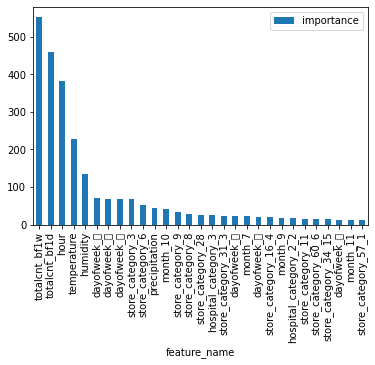

In [59]:
importance_df.loc[importance_df["importance"] > 10].sort_values("importance", ascending = False).plot.bar(x = "feature_name")

In [33]:
passenger_prediction.head(20)

,dayofweek,month,hour,totalcnt_bf1d,totalcnt_bf1w,temperature,humidity,precipitation,snowfall,pm_alert_cnt,...,school_category_0,school_category_1,school_category_2,school_category_3,school_category_4,school_category_5,event_nearby,festival_nearby,totalcnt,Label
620346,수,4,18,12.0,15.0,11.5,25.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,15.0,12.865664
279555,수,5,3,0.0,0.0,13.8,56.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0.0,0.021578
645997,금,8,13,1.0,6.0,28.7,74.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0.0,3.132348
333625,목,9,1,0.0,0.0,21.8,88.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0.0,0.063066
711157,화,4,13,9.0,NaN,21.0,16.0,0.0,0.0,0,...,0,0,0,1,0,0,0,0,11.0,6.559430
29586,월,5,18,0.0,4.0,22.1,61.0,0.0,0.0,0,...,0,0,0,1,0,0,0,0,2.0,3.729559
599449,목,7,1,0.0,0.0,20.6,98.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0.0,0.133912
528404,금,11,20,0.0,0.0,16.3,72.0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0.0,0.084563
205646,목,5,14,0.0,0.0,24.9,28.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0.0,0.201218
408368,화,10,8,8.0,8.0,14.3,71.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,8.0,7.685927


In [ ]:
passenger_prediction.head()

In [ ]:
bese_model.

In [21]:
bese_model.predict(X = splitted_data["X_train"])

ValueError: Number of features of the model must match the input. Model n_features_ is 501 and input n_features is 114 

In [2]:
%%time
mybicard = pd.read_parquet('/home/seho/Passenger_Demand/data/mybicard.parquet', engine='pyarrow')

CPU times: user 50.3 s, sys: 32.3 s, total: 1min 22s
Wall time: 34.5 s


In [ ]:
ml_data = pd.read_parquet("/home/seho/Passenger_Demand/data")

In [ ]:
reg_experiment = setup(housing_data, 
                       target = 'median_house_value', 
                       session_id=123, 
                       log_experiment=True, 
                       experiment_name='ca_housing')